¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd# importar librerías
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv("/datasets/instacart_orders.csv", sep= ";")
products = pd.read_csv("/datasets/products.csv", sep = ";")
aisles = pd.read_csv("/datasets/aisles.csv", sep = ";")
departments = pd.read_csv("/datasets/departments.csv", sep = ";")
order_products = pd.read_csv("/datasets/order_products.csv", sep = ";")


In [3]:
orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products.info(show_counts=True)# mostrar información del DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

    En todos los datasets se pueden observar valores ausentes que deberán ser procesados, asì también existen tipos de datos que se deberán convertir antes de comenzar con el procesamiento de los mismos


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(f"El total de pedidos duplicados es: {orders.duplicated().sum()}")# Revisa si hay pedidos duplicados
print()
print(orders[orders.duplicated()]) #impime duplicados del dataframe orders


El total de pedidos duplicados es: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   128

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

    Existen 15 lineas duplicadas, y todas aquellas órdenes fueron realizadas el mismo día y a la misma hora.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(orders.query("order_hour_of_day == 2")[["order_id","order_hour_of_day"]]) #filtrado por hora del día


        order_id  order_hour_of_day
145      1373529                  2
169      3129415                  2
894      2672805                  2
950       284735                  2
1260     2537018                  2
...          ...                ...
477526   2592344                  2
477624   1448965                  2
477920   2668224                  2
478126    852233                  2
478321   1629284                  2

[1004 rows x 2 columns]


¿Qué sugiere este resultado?
    A las 2:00 de la mañana se registraron un total de 1004 pedidos

In [10]:
orders = orders.drop_duplicates()# Elimina los pedidos duplicados


In [11]:
print(f"El total de filas duplicadas es: {orders.duplicated().sum()}")# Vuelve a verificar si hay filas duplicadas


El total de filas duplicadas es: 0


In [12]:
print(orders[orders["order_id"].duplicated()])# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados y eliminaste esos casos. 
    
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos

    Se encontraron órdenes de pedidos duplicadas, para ser exactos, 15, por lo cual se procede con la eliminación de estos datos para evitar errores en los resultados posteriores.

### `products` data frame

In [13]:
print(products[products.duplicated()])# Verifica si hay filas totalmente duplicadas


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
print(products[products["department_id"].duplicated()])# Revisa únicamente si hay ID de departamentos duplicados


       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [15]:
products_upper = products["product_name"].str.upper()# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_duplicated = products_upper[products_upper.duplicated()]
products_duplicated


71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 1361, dtype: object

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo verificar que estamos conviertiendo a letras mayusculas y guardandolo en la variable de interes. Para cuando analicemos los duplicados sea con la variable transformada a mayusculas.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se corrige el código de acuerdo a la recomendación del revisor para guardar la variable de interés que luego se usa para analizar los duplicados
</div>

In [16]:
print(products[products["product_name"].str.upper().isna().duplicated()])# Revisa si hay nombres duplicados de productos no faltantes


       product_id                                       product_name  \
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
5               6                                       Dry Nose Oil   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
1           104             13  
2            94              7  
3            38              1  
4  

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Luego del análisis del dataset se pudo evidenciar que no existen filas completas duplicadas por lo que no hubo la necesidad de eliminar ninguna, por otro lado existen valores duplicados en los campos de product_name y department_id pero es normal ya que los usuarios ordenarán varias veces determinados productos que pertenecen a esos campos.

### `departments` data frame

In [17]:
print(f"Total de filas duplicadas: {departments.duplicated().sum()}")# Revisa si hay filas totalmente duplicadas


Total de filas duplicadas: 0


In [18]:
departments.info()# Revisa únicamente si hay IDs duplicadas de productos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Hola, Marco! Solamente verifica que cuentas con la variable "product_id".
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
De acuerdo con el comentario del revisor, usando el metodo .info, se verifica que la variable "product_id" no existe en el dataframe
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Brevemente se pudo observar que no existen filas totalmente duplicadas y que el dataset no contiene el campo product_id para determinar si existen o no duplicados, es por eso que el resultado del código que pretende hacer este filtrado arroja un error.

### `aisles` data frame

In [19]:
print(f"La cantidad de filas totalmente duplicadas es: {aisles.duplicated().sum()}")# Revisa si hay filas totalmente duplicadas

La cantidad de filas totalmente duplicadas es: 0


In [20]:
aisles.info()# Revisa únicamente si hay IDs duplicadas de productos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Al igual que con el dataset departments, este tampoco tiene filas totalmente duplicadas y no se puede localicar el product_id porque no existe.

### `order_products` data frame

In [21]:
print(f"La cantidad de filas totalmente duplicadas es: {order_products.duplicated().sum()}")# Revisa si hay filas totalmente duplicadas


La cantidad de filas totalmente duplicadas es: 0


In [22]:
print(f"Duplicados en columna order_id: {order_products['order_id'].duplicated().sum()}")# Vuelve a verificar si hay cualquier otro duplicado engañoso
print()
print(f"Duplicados en columna product_id: {order_products['product_id'].duplicated().sum()}")# Vuelve a verificar si hay cualquier otro duplicado engañoso



Duplicados en columna order_id: 4094961

Duplicados en columna product_id: 4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    De la revisión realizada, no existen filas completamente duplicadas, sin embargo los campos de order_id y product_id podrian indicar que existen duplicados pero esto es normal, ya que en un sólo pedido podemos tener varios productos con el mismo order_id, asi mismo, muchas órdenes de compra incluirán muchos productos que se repitan entre si, por tanto no debemos manipular esta información.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
print(products[products["product_name"].isna()])# Encuentra los valores ausentes en la columna 'product_name'

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

    Existen 1258 productos con valores ausentes

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

aisle100 = products[products["product_name"].isna()] #almacena los valores ausentes
print(aisle100["aisle_id"].mean()) #calcula el promedio de los valores de la columna aisle_id

100.0


Describe brevemente cuáles son tus hallazgos.

    Es correcto, todos los nombres de los productos faltantes están relacionados con el pasillo 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

id21 = products[products["product_name"].isna()] #almacena los valores ausentes
print(id21["department_id"].mean()) #calcula el promedio de los valores de la columna department_id

21.0


Describe brevemente cuáles son tus hallazgos.

    También en cierto que todos los nombres de los productos ausentes están relacionados con el ID 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(departments.loc[20]) #localiza los valores del department_id 21
print()
print(aisles.loc[99]) #localiza los valores del aisle_id 100


department_id         21
department       missing
Name: 20, dtype: object

aisle_id        100
aisle       missing
Name: 99, dtype: object


Describe brevemente cuáles son tus hallazgos.

    Tanto el ID del departamento 21 como el ID del pasillo 100 muestra que existe información catalogada como faltante (missing)

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

products["product_name"] = products["product_name"].fillna("Unknown") #reemplaza los valores ausentes por "Unknown"

products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    En la columna product_name se encontraron valores ausentes que fueron reemplazados con "Unknown", luego al aplicar método info al dataframe products, se puede observar que ya no existen valores ausentes.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.info()
print()
print(f"Existen valores ausentes en el campo 'days_since_prior_order':")
print()
print(orders[orders["days_since_prior_order"].isna()]) #muestra los valores ausentes del campo 'days_since_prior_order'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

Existen valores ausentes en el campo 'days_since_prior_order':

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Aplicando el método info al dataframe orders, se puede ver que únicamente el campo "days_since_prior_order" posee valores ausentes.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.isna().sum() #muestra los valores ausentes del campo "add_to_cart_order"

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"El valor mínimo de la columna 'add_to_cart_order' es: {order_products['add_to_cart_order'].min()}") #muestra el valor mínimo de 'add_to_cart_order' 
print()
print(f"El valor máximo de la columna 'add_to_cart_order' es: {order_products['add_to_cart_order'].max()}") #muestra el valor máximo de 'add_to_cart_order'

El valor mínimo de la columna 'add_to_cart_order' es: 1.0

El valor máximo de la columna 'add_to_cart_order' es: 64.0


Describe brevemente cuáles son tus hallazgos.

    Obteniendo el valor mínimo y máximo del campo "add_to_cart_order", pudimos determinar los usuarios realizaron compras en una misma orden, de al menos 1 producto y máximo 64 productos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


idnan = order_products[order_products["add_to_cart_order"].isna()]["order_id"] #filtra por valores ausentes en "add_to_cart_order"
idnan

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

En este paso consdiera solamente los IDs de pedidos que tengan un valor ausente en 'add_to_cart_order' que identificaste en el paso anterior y calcules la cantidad agrupada de cada "order_id". 

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Siguiendo las recomendaciones del revisor, se corrige el código para agrupar los IDs de pedidos con valor ausente en "add_to_cart_order", para obtener la cantidad de productos de estas órdenes.
</div>

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

idnan_group = order_products[order_products["order_id"].isin(idnan)] #agrupa pedidos con valores ausentes en add_to_cart_order
idnan_count = idnan_group.groupby("order_id")["product_id"].count() #cuenta los productos con valores ausentes
print(f"La cantidad mínima de productos en una orden es: {idnan_count.min()}")

La cantidad mínima de productos en una orden es: 65


Describe brevemente cuáles son tus hallazgos.

    Luego del análisis realizado se puede observar que todas órdenes con valores ausentes en "add_to_cart_order", tienen al menos 65 productos.
    Podrá existir un problema a nivel del sistema que no registra el orden en los que se añade al carrito luego del producto 64.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype("int")
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Dado que los valores del campo "add_to_cart_order" indican el orden en que se pusieron los productos al carrito de compras, los valores ausentes fueron reemplazados con el número 999 que indicarían que fueron los últimos en agregarse, y dado que en las órdenes de compra con estos valores ausentes, ninguna supera los 64 productos, no habría ningún conflicto en el dataset con esta asignación.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

    Antes de análizar los datasets y empezar a sacar conclusiones, uno de los pasos más importantes es verificar la existencia de información duplicada y ausente.
    Una vez verificada la existencia de valores duplicados y ausentes, no se debe apresurar a eliminarlos y reemplazarlos, sin antes verificar cual es su origen y que representan dentro del dataset.
    Una vez verificado que efectivamente existen filas duplicadas se puede eliminar los duplicados para evitar errores en las conclusiones finales, de igual manera con los datos ausentes, se pueden reemplazar con otros valores que hagan sentido.
    Por último, es necesario verificar el tipo de datos del dataframe y transformalos con criterio al tipo correcto, teniendo en cuenta si se trata de información cualitativa o categórica.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(f"Verificando coherencia en los valores del campo order_hour_of_day")
print()
print(orders["order_hour_of_day"].drop_duplicates().sort_values()) #muestra las horas del día registradas en el dataframe


Verificando coherencia en los valores del campo order_hour_of_day

23       0
37       1
145      2
193      3
2048     4
408      5
87       6
45       7
6        8
13       9
19      10
5       11
1       12
0       13
29      14
8       15
11      16
32      17
7       18
2       19
3       20
173     21
17      22
228     23
Name: order_hour_of_day, dtype: int64


In [36]:
print(f"Verificando coherencia en los valores del campo order_dow")
print()
print(orders["order_dow"].drop_duplicates().sort_values()) #muestra los días de la semana registrados en el dataframe

Verificando coherencia en los valores del campo order_dow

3     0
12    1
19    2
6     3
4     4
1     5
0     6
Name: order_dow, dtype: int64


Escribe aquí tus conclusiones

    Se puede garantizar la coherencia de los datos ingresados en ambos campos, es decir para el campo "order_hour_of_day", los valores oscilan entre 0 y 23, que corresponden a las horas del día y datos del campo "order_dow" oscilan entre 0 y 6, que identifican los días de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

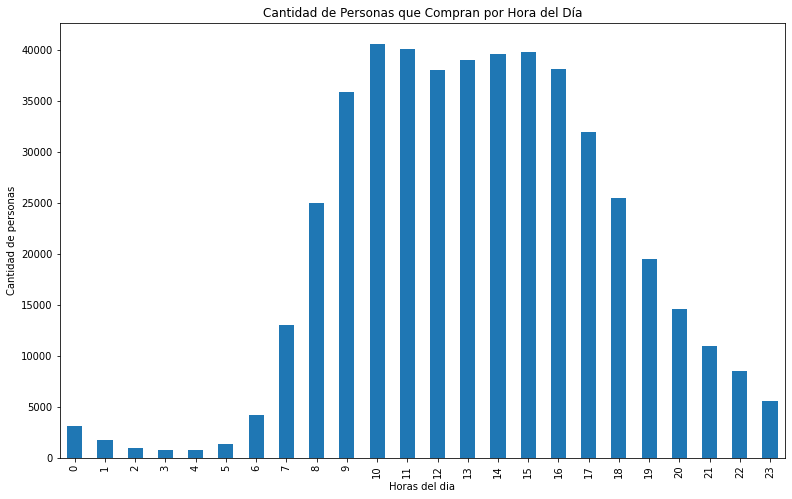

In [37]:
# Agrupar las órdenes por "order_hour_of_day" y contar la cantidad de IDs de usuario
orders_grouped = orders.groupby("order_hour_of_day")["user_id"].count()
orders_grouped.plot(x= "order_hour_of_day", #crea un gráfico de barras
                    y = "user_id",
                    kind = "bar",
                    figsize = [13,8],
                    title = "Cantidad de Personas que Compran por Hora del Día",
                    xlabel = "Horas del dia",
                    ylabel = "Cantidad de personas")
plt.show() #muestra el gráfico

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Buen uso de la gráfica de barras para mostrar la distribución por horas.
    
</div>

Escribe aquí tus conclusiones

    Podemos observar que entre las 3:00 y 4:00 es donde menos persona realizan órdenes, por otro lado en el horario de 10:00 a 11:00 tenemos un pico máximo de personas que realizan órdenes.

### [A3] ¿Qué día de la semana compran víveres las personas?

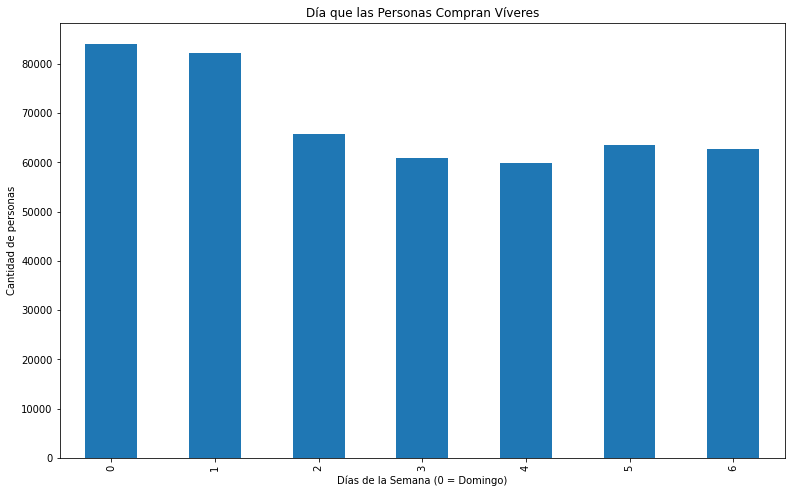

In [38]:
# Agrupar las órdenes por "order_dow" y contar la cantidad de IDs de usuario

orders_grouped_days = orders.groupby("order_dow")["user_id"].count()

orders_grouped_days.plot(x= "order_dow", #crea un gráfico de barras
                    y = "user_id",
                    kind = "bar",
                    figsize = [13,8],
                    title = "Día que las Personas Compran Víveres",
                    xlabel = "Días de la Semana (0 = Domingo)",
                    ylabel = "Cantidad de personas")
plt.show() #muestra el gráfico


Escribe aquí tus conclusiones

    De acuerdo con la gráfica se puede ver que el día de la semana que los usuarios hacen sus compras es el día domingo, sin embargo, el día lunes también existe un número importante de personas que acuden a hacer sus compras.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

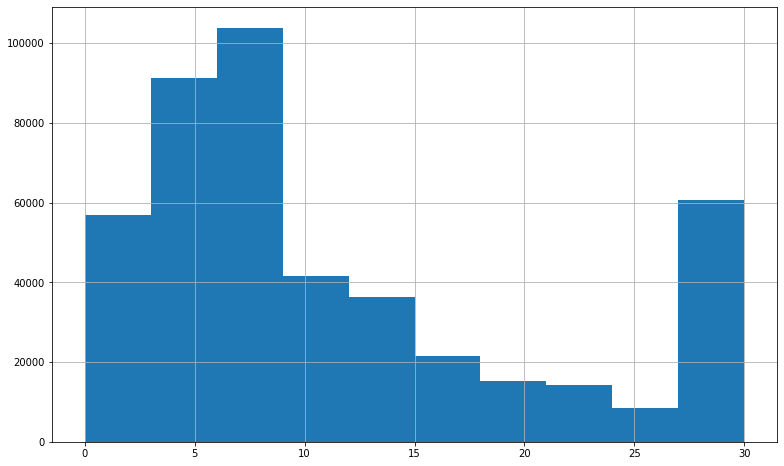

In [39]:
orders["days_since_prior_order"].hist(figsize = [13,8]) #crea un histograma de "days_since_prior_order"
plt.show() #muestra el histograma

Escribe aquí tus conclusiones

    De acuerdo con el gráfico mostrado, las personas que hacen un nueva compra de manera inmediata y las personas que hacen una nueva compra dentro de 30 días, son en cantidad similares, pero la mayoría de las personas las hacen aproximadamente cada 7 días, es decir cada semana, lo cual también tendría mucho que ver con la conclusión anterior de que la mayoría de personas hace sus compras entre domingo y lunes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Agrupar las órdenes por "order_dow" y busca coincidencias con los elementos de la lista
filtered_days = orders[orders['order_dow'].isin([3, 6])] 

In [41]:
filtered_days.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
6,2511640,148233,40,3,8,2.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
16,3109465,55090,19,3,15,9.0


In [42]:
# Agrupar los días filtrados por "order_dow" y cuenta la cantidad elementos en order_id
grouped_days = filtered_days.groupby("order_dow")["order_hour_of_day"].count()
grouped_days

order_dow
3    60897
6    62649
Name: order_hour_of_day, dtype: int64

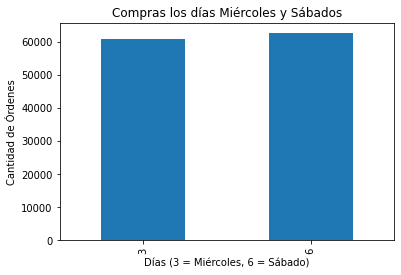

In [43]:
grouped_days.plot(x = "order_hour_of_day",
                  
                  kind = "bar",
                 title = "Compras los días Miércoles y Sábados",
                 xlabel = "Días (3 = Miércoles, 6 = Sábado)",
                 ylabel = "Cantidad de Órdenes")



plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Para este caso, debemos de filtrar por los días miércoles y sábados y posteriormente hacer el conteo para cada hora del día. Estos valores los juntamos en una sola base y posteriormente los graficamos para poder visualizar de forma clara los resultados. 

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
De acuerdo con el comentario del revisor, se filtra por miércoles y sábado y se realiza el conteo por día para luego graficar y mostrar las diferencias.
</div>

Escribe aquí tus conclusiones

    Las cantidad de órdenes de los días miércoles y sábados son bastante parecidas, el día sábado es ligeremante superior pero son equiparables.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
# Agrupar los días filtrados por "order_number" y cuenta la cantidad elementos en user_id
orders_by_client = orders.groupby("order_number")["user_id"].count()
orders_by_client

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

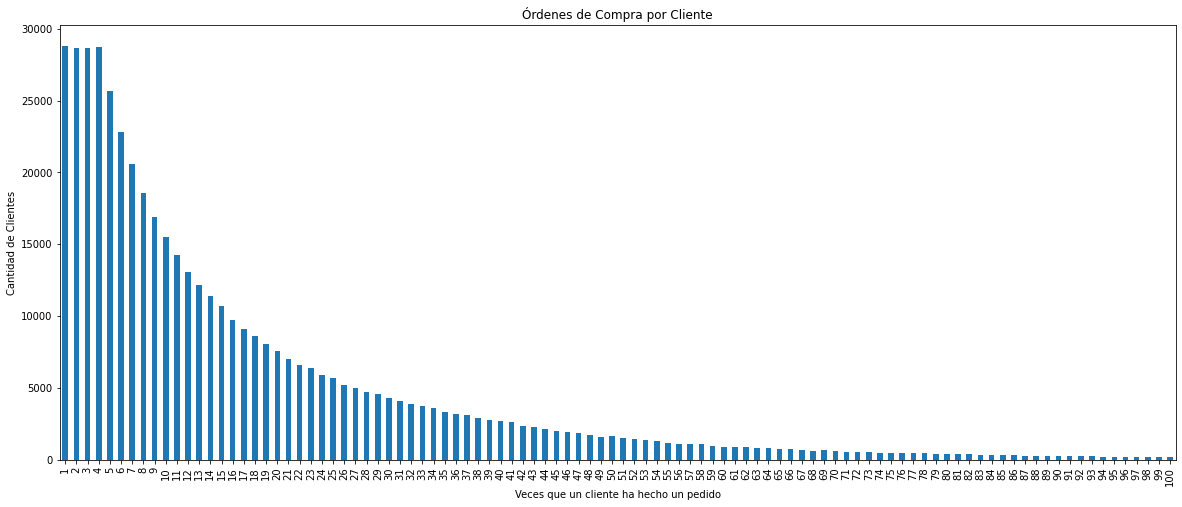

In [45]:
#crea un gráfico de barras order_numer
orders_by_client.plot(x = "order_number",
                     kind = "bar",
                     title = "Órdenes de Compra por Cliente",
                     xlabel = "Veces que un cliente ha hecho un pedido",                      
                     ylabel = "Cantidad de Clientes",
                     figsize = [20,8])

plt.show() #muestra gráfico

Escribe aquí tus conclusiones

    Del gráfico se desprende que la mayoría de personas han hecho entre 1 y 4 veces pedidos, y que a más pedidos la cantidad de clientes va disminuyendo también.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
#junta los datasets order_products y products por la columna en común product_id
merged_products = order_products.merge(products, on = "product_id")

#calcula los 20 productos más populares, contando las veces que un cliente las ordenó
most_wanted_products = merged_products[["product_name","product_id"]].value_counts().iloc[:20]



In [47]:
most_wanted_products

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
dtype: int64

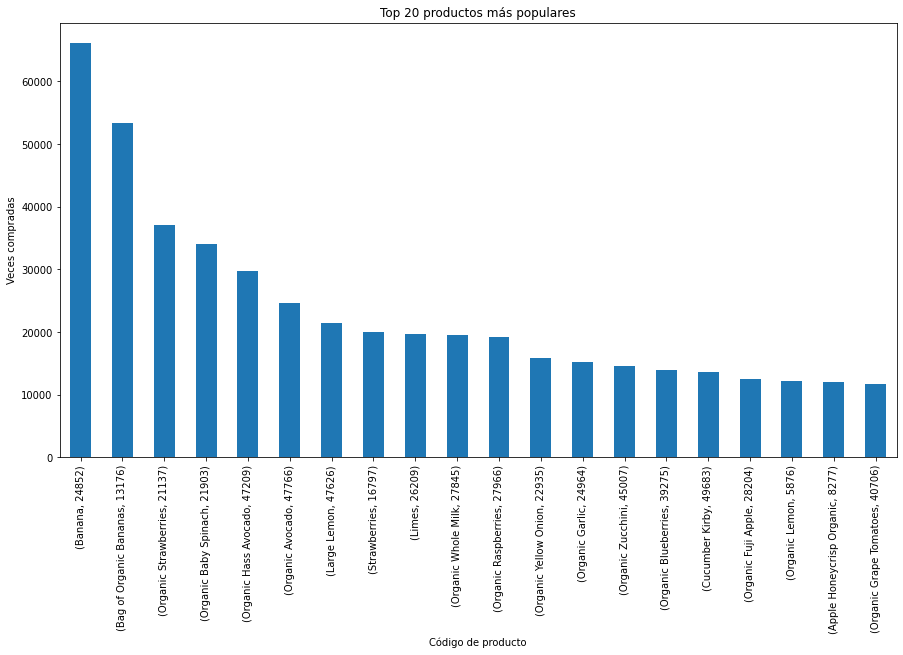

In [48]:
#crea un gráfico de barras para la columna product_name
most_wanted_products.plot(x = "product_name",
                         kind = "bar",
                          title = "Top 20 productos más populares",
                         figsize = [15,8],                          
                         xlabel = "Código de producto",
                         ylabel = "Veces compradas")

plt.show() #muestra el gráfico

Escribe aquí tus conclusiones

    Las bananas son el producto más popular de la tienda y cerrando el top 20 los tomates orgánicos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
#filtra order_products por order_id y selecciona las columnas product_id y order_id
q_products = order_products.query("order_id")[["product_id","order_id"]]

In [50]:
q_products

,product_id,order_id
2141543,49481,3335445
567889,26591,1669928
2261212,22959,3259836
491251,48109,2828756
2571142,40251,1665005
...,...,...
577211,21334,1897629
1219554,36792,219735
692640,25187,3355200
319435,35951,155010


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para visualziar mejor los resultados, te recomiendo usar kind='bar', dado que ya lo tienes ordenado y en frecuencia los datos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Se intentó realizar el gráfico pero al haber demasiados pedidos el kernel no lo soportó, no se incluye un gráfico.
</div>

In [65]:
#muestra el promedio de productos que las personas compran en un pedido
print(f"Normalmente las personas compran en un mismo pedido {q_products.groupby('order_id')['product_id'].count().mean()} productos")




Normalmente las personas compran en un mismo pedido 17.874024697184208 productos


Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
#Une los dataframes orders y order_products por medio de la columna en común order_id
merged_orders_order_products = orders.merge(order_products, on = "order_id")
merged_orders_order_products

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15.0,1503,17,0
4545003,2071924,1730,18,1,14,15.0,4778,12,1
4545004,2071924,1730,18,1,14,15.0,11512,1,1
4545005,2071924,1730,18,1,14,15.0,4920,6,1


In [53]:
#Une los dataframes merged_orders_order_products y products por medio de la columna en común product_id
merged_orders_order_products_names = merged_orders_order_products.merge(products, on = "product_id")
merged_orders_order_products_names

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1515936,183418,11,6,13,30.0,19048,1,1,Organic Butternut Squash,83,4
1,787445,25685,1,6,18,NaN,19048,16,0,Organic Butternut Squash,83,4
2,1646929,205815,37,5,13,8.0,19048,11,0,Organic Butternut Squash,83,4
3,276490,1004,24,1,12,11.0,19048,1,1,Organic Butternut Squash,83,4
4,1300214,33481,7,5,9,6.0,19048,9,1,Organic Butternut Squash,83,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4545002,724656,148196,8,1,12,6.0,17942,35,1,Steamables Golden Potatoes,83,4
4545003,494864,27698,10,3,22,30.0,39288,12,1,Chicken Strips,49,12
4545004,1537077,20022,1,1,12,NaN,22976,11,0,Jacked Ranch Hot Chips,107,19
4545005,3215753,16884,21,6,8,3.0,40617,2,0,Ginger Peach With Matcha Tea,94,7


In [54]:
#filtra el dataframe merged_orders_order_products_names por la consulta donde reordered sea igual a 1, cuenta las ocurrencias
#y selecciona las 20 principales
reordered_products = merged_orders_order_products_names.query("reordered == 1")["product_name"].value_counts().iloc[:20]

In [55]:
reordered_products

Banana                      55763
Bag of Organic Bananas      44450
Organic Strawberries        28639
Organic Baby Spinach        26233
Organic Hass Avocado        23629
Organic Avocado             18743
Organic Whole Milk          16251
Large Lemon                 15044
Organic Raspberries         14748
Strawberries                13945
Limes                       13327
Organic Yellow Onion        11145
Organic Garlic              10411
Organic Zucchini            10076
Cucumber Kirby               9538
Organic Fuji Apple           8989
Apple Honeycrisp Organic     8836
Organic Blueberries          8799
Organic Lemon                8412
Organic Half & Half          8389
Name: product_name, dtype: int64

Escribe aquí tus conclusiones

    Las bananas lideran los productos que se vuelven a comprar con mayor frecuencia, seguido de las bolsas de bananas orgánicas y las frutillas.
    Al menos el 50% de los productos del top 20 que se recompran son frutas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
#agrupa el dataframe merged_orders_order_products_names por product_name y obtiene el promedio de los valores
#de la columna reordered
every_product_pro = merged_orders_order_products_names.groupby("product_name")["reordered"].mean()
every_product_pro

product_name
#2 Coffee Filters                                                  0.254545
#2 Cone White Coffee Filters                                       0.000000
#2 Mechanical Pencils                                              0.000000
#4 Natural Brown Coffee Filters                                    0.358974
& Go! Hazelnut Spread + Pretzel Sticks                             0.466667
                                                                     ...   
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum    0.000000
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum          0.100000
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum             0.428571
with a Splash of Mango Coconut Water                               0.250000
with a Splash of Pineapple Coconut Water                           0.454545
Name: reordered, Length: 44614, dtype: float64

In [57]:
every_product_pro.head(10)

product_name
#2 Coffee Filters                                  0.254545
#2 Cone White Coffee Filters                       0.000000
#2 Mechanical Pencils                              0.000000
#4 Natural Brown Coffee Filters                    0.358974
& Go! Hazelnut Spread + Pretzel Sticks             0.466667
(70% Juice!) Mountain Raspberry Juice Squeeze      1.000000
+Energy Black Cherry Vegetable & Fruit Juice       0.428571
0 Calorie Acai Raspberry Water Beverage            0.583333
0 Calorie Fuji Apple Pear Water Beverage           0.833333
0 Calorie Strawberry Dragonfruit Water Beverage    0.782609
Name: reordered, dtype: float64

In [58]:
every_product_pro.tail(10)

product_name
with Twist Ties Sandwich & Storage Bags                            0.500000
with Xylitol Cinnamon 18 Sticks Sugar Free Gum                     0.681818
with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum            0.750000
with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum            0.000000
with Xylitol Original Flavor 18 Sticks Sugar Free Gum              0.470588
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum    0.000000
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum          0.100000
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum             0.428571
with a Splash of Mango Coconut Water                               0.250000
with a Splash of Pineapple Coconut Water                           0.454545
Name: reordered, dtype: float64

Escribe aquí tus conclusiones

    Existen varios productos que no se vuelven a pedir nunca y otros que son los favoritos de los clientes que siempre se recompran.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
#filtra el dataframe merged_orders_order_products_names por order_id 
every_product_client = merged_orders_order_products_names.query("order_id")[["product_name","reordered","user_id","product_id"]]
every_product_client.head()

,product_name,reordered,user_id,product_id
1515936,Organic Gala Apples,1,13562,37646
787445,Unsweetened Original Almond Breeze Almond Milk,1,44262,47144
1646929,Traditional Snack Mix,1,50341,40285
276490,Icelandic Style Skyr Blueberry Non-fat Yogurt,1,9945,28465
1300214,Cran-Raspberry Flavored Sparkling Water,1,125877,7693


In [60]:
#agrupa el dataframe every_product_client por user_id y obtiene el promedio de los valores de la columna reordered
every_product_user= every_product_client.groupby("user_id")[["reordered"]].mean()
every_product_user


,reordered
user_id,
2,0.000000
5,0.979167
6,0.000000
7,1.000000
11,1.000000
...,...
206203,1.000000
206206,1.000000
206207,1.000000


Escribe aquí tus conclusiones

    Existen usuarios que no hicieron ninguna recompra de un producto y otros que recompraron todos sus productos en diferentes órdenes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
#Filtra el dataframe merged_orders_order_products_names por los productos que fueron primeros en añadir al carrito
first_products_cart = merged_orders_order_products_names.query("add_to_cart_order == 1")[["product_id","product_name","add_to_cart_order"]]
first_products_cart


,product_id,product_name,add_to_cart_order
0,19048,Organic Butternut Squash,1
3,19048,Organic Butternut Squash,1
16,19048,Organic Butternut Squash,1
18,19048,Organic Butternut Squash,1
40,19048,Organic Butternut Squash,1
...,...,...,...
4544953,32389,Original Animal Crackers,1
4544984,34074,16 Bean Soup Mix,1
4544985,18592,Quercetin 500 Mg,1
4545000,29187,Sore Throat & Cough Vapor Cherry Losenges,1


In [62]:
#agrupa el dataframe first_products_cart por product_name y cuenta las ocurrencias por product_id
#y ordena los valores resultantes
grouped_first_cart = first_products_cart.groupby("product_name")["product_id"].count().sort_values()

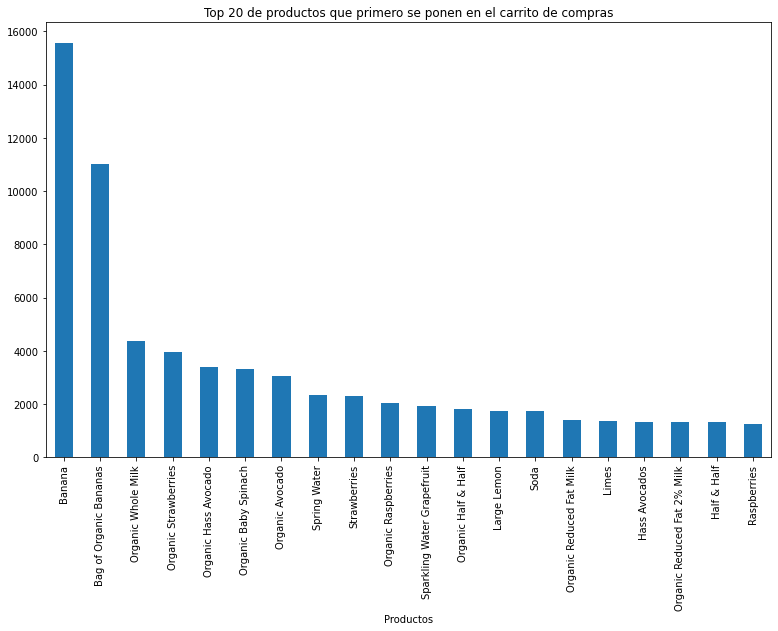

In [63]:
#muestra el top 20 de los productos que los clientes ponen primero en sus carritos
plot_first_cart = grouped_first_cart.tail(20).sort_values(ascending=False)

print()
#genera un gráfico de barras por product_name vs la frecuencia de compra
plot_first_cart.plot(x = "product_name",
                    kind = "bar",
                    title = "Top 20 de productos que primero se ponen en el carrito de compras",
                    xlabel = "Productos",
                    y = "Cantidad de productos vendidos",
                    figsize =[13,8])

plt.show()

Escribe aquí tus conclusiones

    Del análisis podemos concluir que el top 3 de productos que los cliente primero ponen en sus carritos está compuesta por bananas, bolsa de bananas orgánicas y leche entera orgánica.
    De este mismo modo podríamos intuir que el primer pasillo al que acuden los clientes durante sus compras, es el pasillo de fruta fresca.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

### Conclusion general del proyecto:

Luego del profundo análisis realizado para este proyecto, podemos concluir lo siguiente:
    
    - Los horarios de menos actividad en la tienda está en el rango de 3:00 a 4:00, mientras que la franja horaria donde los clientes hacen más pedidos está en el rango de las 10:00 a 11:00
    - Las personas acuden en mayor cantidad a realizar sus compras los días domingos, no obstante, los días lunes también existe un grupo de clientes significativo que acude a la tienda
    - La mayoría de los usuarios prefiere realizar sus compras cada 7 días, es decir semanalmente, eligiendo como día favorito el día domingo
    - El día jueves es el menos favorito para acudir a la tienda por compras semanales
    - El promedio aproximado de pedidos por cliente es de 3
    - Las bananas y la bolsa de bananas orgánicas son los productos más populares de la tienda
    - Podría existir alguna falla en el sistema de registro de los productos que ingresan al carrito de compras, ya que luego del producto 65, este no registra ningún orden
    - El promedio de productos que los clientes se llevan por cada orden es de 18, aproximadamente
    - El las bananas y bolsa de bananas vuelven a liderar como los productos que la gente recompra en sus siguientes órdenes
    - Las frutas son las más recompradas, ya que del top 20 de productos que la gente recompra, el 50% son frutas
    - Existen productos que la gente no recompra y otros que siempre los recompran, esto puede servir para idear una estrategia para incentivar los productos poco comprados o sacarlos definitivamente de percha y potenciar los productos que la gente más pide
    - Por último, las bananas es el producto número 1 que los clientes coloca en su carrito, lo que también podría significar que es el primer pasillo en visitar y posiblemente el más visitado por los clientes

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, análisis de duplicados, y de valores faltantes. Además dearrollaste de buena manera los diferentes anális que se solicitaban y cuando podías los complementabas con greaficas. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Revisar que los filtros sean correctos en algunos apartados con base en la indicación
    
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos. 
    
*  Realizar gráficas de barras en algunos análisis para complementarlos.
    
*  Ordenar los datos para que sean más claros los resultados.
    
*  Profundizar en los resultados intermedios

</div>